# TCDS - Final Project

![Favorita Corporation](logo-favoritas.png "Favorita Corporation")
# Forecasting purchases of items per day and store

http://www.corporacionfavorita.com/



***


# Methodology
***

## Exploratory Data Analysis (EDA) 
In the EDA we will show descriptive statistics of our data using basic statistics:
- 1. For continuous numeric variables, we use the following statistics:
    - 1.1 Mean and Standard deviation
    - 1.2 Median and Interquartile rate
    - 1.3 Minimum and Maximum
    - 1.4 Identify, quantity,Percentage and type of missing values 
  
  
- 2. Identify data types and data distributions - For Nominal and ordinal data (categorical data):
    - 2.1 Frequencies (% of each category - ordered in descending order)
    - 2.2 % of missing values
    
    
- 3. Identify outliers (univariate and multivariate)
     We will also show graphs which will help us to unsderstand distribution types of numeric and categorical data.

- 4. Identify data patterns (using cluster analysis / PCA)

## Clear outcome variable definition:
Forecasting purchases of items per day and store  

## Variable engineering:
we decided to add some pameters to oue dataset: oil price 15 days ago 30 days ago and the ratio of changes from actual price. becouse we assume that oil price influance after aperiod and not at the same day.
we add also the ratio of city population so it will be a number and not category.
and we add log of weight_unit_sale so it will normalize the distribution and will help for graphs visualisations.


## Outliers determination and treatment:



## Missing values - determination of MCAR-MAR-MNAR, treatment: 
in our case the only missing values where in daily oil price - about 30% of records where nan (NULL)
it is MNAR because its wekends dates . the way we treated it was by updating tae last day known price 

## Data retrieval protocol: the excel file

***

# import packeges:

In [1]:
#import packeges

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels
import pyMechkar as mechkar
import pyodbc 

from sqlalchemy import create_engine
import urllib
import pyTable1 as tbl1
import math
import os
print(os.getcwd())

C:\Users\ZVI


### Display options:

In [2]:
#configure the output graght
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_colwidth',10)
pd.set_option('display.precision',6)
pd.options.display.float_format = '{0:,.2f}'.format

In [3]:
#read the SQL - prepared dataset
sql_conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-FMCJ0N31\SQLEXPRESS01;'
                      'Database=EXPLOR_DATA;'
                      'Trusted_Connection=yes;')

#query ="SELECT top 10000 * from final_train ORDER BY NEWID()" 
query ="SELECT  * from final_train_s44_i100"

#execute sql query
df_44_100= pd.read_sql(query,sql_conn)

In [4]:
FF_X = df_44_100.copy()

#TRAIN = X.copy()

In [6]:
#FF_X_GRAPH= df_44_100.copy()

### Delete row with unit_sales value lower than 0 
#### we dont deal with returns (negative value of unit_sales)

In [7]:
FF_X = FF_X[(FF_X['unit_sales'] >0)]
 

In [8]:
FF_X[(FF_X['unit_sales'] <0)]

,date,month,day_of_week,season,store_nbr,item_nbr,Toal_trans_store_day,city,city_population,state,type,cluster,family,class,LocalHoliday,RegionalHoliday,NationalHoliday,unit_sales,onpromotion,dcoilwtico,perishable,is_pay_day_m2,is_pay_day_m1,is_pay_day,is_pay_day_p1,is_pay_day_p2


In [9]:
FF_X

,date,month,day_of_week,season,store_nbr,item_nbr,Toal_trans_store_day,city,city_population,state,type,cluster,family,class,LocalHoliday,RegionalHoliday,NationalHoliday,unit_sales,onpromotion,dcoilwtico,perishable,is_pay_day_m2,is_pay_day_m1,is_pay_day,is_pay_day_p1,is_pay_day_p2
0,2014-0...,4,3,spring,44,108797,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1004,0,0,0,17.00,0,99.69,0,0,0,0,1,0
1,2014-0...,4,3,spring,44,115693,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1040,0,0,0,10.00,0,99.69,0,0,0,0,1,0
2,2014-0...,4,3,spring,44,119024,4158,Quito,1399814,Pichincha,A,5,CLEANING,3026,0,0,0,26.00,0,99.69,0,0,0,0,1,0
3,2014-0...,4,3,spring,44,129297,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1032,0,0,0,4.00,0,99.69,0,0,0,0,1,0
4,2014-0...,4,3,spring,44,129758,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1032,0,0,0,11.00,0,99.69,0,0,0,0,1,0
5,2014-0...,4,3,spring,44,159156,4158,Quito,1399814,Pichincha,A,5,POULTRY,2416,0,0,0,56.08,0,99.69,1,0,0,0,1,0
6,2014-0...,4,3,spring,44,164037,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1048,0,0,0,15.00,0,99.69,0,0,0,0,1,0
7,2014-0...,4,3,spring,44,174081,4158,Quito,1399814,Pichincha,A,5,BEVERAGES,1136,0,0,0,30.00,0,99.69,0,0,0,0,1,0
8,2014-0...,4,3,spring,44,208384,4158,Quito,1399814,Pichincha,A,5,EGGS,2502,0,0,0,55.00,0,99.69,1,0,0,0,1,0
9,2014-0...,4,3,spring,44,213652,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1048,0,0,0,43.00,0,99.69,0,0,0,0,1,0






### All parameters and Types

In [7]:
df_44_100.family.unique()

array(['GROCERY I', 'CLEANING', 'POULTRY', 'BEVERAGES', 'EGGS', 'DAIRY',
       'BREAD/BAKERY', 'DELI', 'PREPARED FOODS', 'MEATS', 'SEAFOOD',
       'FROZEN FOODS'], dtype=object)

In [8]:
print('No. Of unique clalss:' ,len(df_44_100['class'].unique()))
df_44_100['class'].unique()

No. Of unique clalss: 46


array([1004, 1040, 3026, 1032, 2416, 1048, 1136, 2502, 1122, 1080, 1072,
       3034, 1124, 2124, 1092, 2752, 1014, 1016, 2630, 2112, 3020, 1078,
       2960, 1084, 1012, 1028, 2302, 2306, 2802, 2228, 3046, 2220, 2708,
       1096, 2128, 1088, 1010, 1036, 3024, 1022, 2156, 1120, 1126, 1138,
       2210, 2420], dtype=int64)

In [9]:
print('No. Of unique item numbers:' ,len(df_44_100['item_nbr'].unique()))
df_44_100['item_nbr'].unique()

No. Of unique item numbers: 100


array([ 108797,  115693,  119024,  129297,  129758,  159156,  164037,
        174081,  208384,  213652,  219150,  220435,  258268,  261053,
        264752,  265086,  265559,  271479,  305341,  311994,  314384,
        314879,  315220,  315460,  319093,  329397,  360704,  363895,
        364606,  368424,  368628,  376427,  414750,  418024,  457424,
        463901,  507969,  525902,  557257,  557420,  557810,  559870,
        564533,  564534,  567579,  580929,  582864,  582865,  587069,
        634014,  634054,  651523,  657869,  692537,  699745,  764438,
        781794,  781796,  789224,  795611,  807493,  823245,  827911,
        838215,  838216,  838407,  839363,  841667,  868529,  877514,
        892076,  913964,  968432, 1003679, 1009997, 1036689, 1037846,
       1038945, 1044592, 1047679, 1047681, 1047690, 1047756, 1047790,
       1057033, 1082907, 1084881, 1127862, 1146796, 1158719, 1159414,
       1165987, 1239857, 1239860, 1239861, 1239880, 1239897, 1239901,
       1239903, 1248

In [10]:
FF_X.describe()

,month,day_of_week,store_nbr,item_nbr,Toal_trans_store_day,city_population,cluster,class,LocalHoliday,RegionalHoliday,NationalHoliday,unit_sales,onpromotion,perishable,is_pay_day_m2,is_pay_day_m1,is_pay_day,is_pay_day_p1,is_pay_day_p2
count,"36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00"
mean,6.55,3.99,44.00,"667,062.33","4,493.26","1,399,8...",5.00,"1,729.78",0.01,0.00,0.10,42.28,0.03,0.34,0.07,0.07,0.07,0.07,0.06
std,3.43,1.99,0.00,"351,073.06",750.86,0.00,0.00,754.30,0.07,0.00,0.30,67.84,0.18,0.47,0.26,0.25,0.25,0.25,0.24
min,1.00,1.00,44.00,"108,797.00","3,416.00","1,399,8...",5.00,"1,004.00",0.00,0.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.00,2.00,44.00,"324,245.00","3,912.00","1,399,8...",5.00,"1,040.00",0.00,0.00,0.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,7.00,4.00,44.00,"634,054.00","4,275.00","1,399,8...",5.00,"1,124.00",0.00,0.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,10.00,6.00,44.00,"1,023,3...","4,984.00","1,399,8...",5.00,"2,420.00",0.00,0.00,0.00,46.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
max,12.00,7.00,44.00,"1,248,3...","8,120.00","1,399,8...",5.00,"3,046.00",1.00,0.00,1.00,"3,652.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [11]:
FF_X.head(3)

,date,month,day_of_week,season,store_nbr,item_nbr,Toal_trans_store_day,city,city_population,state,type,cluster,family,class,LocalHoliday,RegionalHoliday,NationalHoliday,unit_sales,onpromotion,dcoilwtico,perishable,is_pay_day_m2,is_pay_day_m1,is_pay_day,is_pay_day_p1,is_pay_day_p2
0,2014-0...,4,3,spring,44,108797,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1004,0,0,0,17.00,0,99.69,0,0,0,0,1,0
1,2014-0...,4,3,spring,44,115693,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1040,0,0,0,10.00,0,99.69,0,0,0,0,1,0
2,2014-0...,4,3,spring,44,119024,4158,Quito,1399814,Pichincha,A,5,CLEANING,3026,0,0,0,26.00,0,99.69,0,0,0,0,1,0


#### we see taht some are objects

In [12]:
pd.set_option('display.max_rows',100)
print(FF_X.shape)
FF_X.dtypes

(36899, 26)


date                     object
month                     int64
day_of_week               int64
season                   object
store_nbr                 int64
item_nbr                  int64
Toal_trans_store_day      int64
city                     object
city_population           int64
state                    object
type                     object
cluster                   int64
family                   object
class                     int64
LocalHoliday              int64
RegionalHoliday           int64
NationalHoliday           int64
unit_sales              float64
onpromotion               int64
dcoilwtico               object
perishable                int64
is_pay_day_m2             int64
is_pay_day_m1             int64
is_pay_day                int64
is_pay_day_p1             int64
is_pay_day_p2             int64
dtype: object

***


In [10]:
# becouse we chenged our prediction to only one store all these prameters are not relevant any more
FF_X=FF_X.loc[:, FF_X.columns != 'store_nbr']
FF_X=FF_X.loc[:, FF_X.columns != 'state']
FF_X=FF_X.loc[:, FF_X.columns != 'city']
FF_X=FF_X.loc[:, FF_X.columns != 'type']
FF_X=FF_X.loc[:, FF_X.columns != 'cluster']
FF_X=FF_X.loc[:, FF_X.columns != 'city_population']

#### convertion of parameters to correct data types 

In [11]:
for col in ['LocalHoliday','RegionalHoliday','NationalHoliday','onpromotion','perishable','is_pay_day_m2','is_pay_day_m1',
            'is_pay_day','is_pay_day_p1','is_pay_day_p2']:
    FF_X[col] = FF_X[col].astype('int64')

In [12]:
for col in ['class','month','day_of_week','season','family']:
    FF_X[col] = FF_X[col].astype('category')

In [13]:
FF_X['date'] = pd.to_datetime(FF_X.date)

In [14]:
FF_X.dcoilwtico =FF_X.dcoilwtico.astype(float)

In [15]:
FF_X.dtypes

date                    dateti...
month                    category
day_of_week              category
season                   category
item_nbr                    int64
Toal_trans_store_day        int64
family                   category
class                    category
LocalHoliday                int64
RegionalHoliday             int64
NationalHoliday             int64
unit_sales                float64
onpromotion                 int64
dcoilwtico                float64
perishable                  int64
is_pay_day_m2               int64
is_pay_day_m1               int64
is_pay_day                  int64
is_pay_day_p1               int64
is_pay_day_p2               int64
dtype: object

In [25]:
#table_FF_X = mechkar.pyMechkar().Table1(data=FF_X,excel=True,excel_file="table4_TRAIN.xlsx")

In [16]:
FF_X.describe()

,item_nbr,Toal_trans_store_day,LocalHoliday,RegionalHoliday,NationalHoliday,unit_sales,onpromotion,dcoilwtico,perishable,is_pay_day_m2,is_pay_day_m1,is_pay_day,is_pay_day_p1,is_pay_day_p2
count,"36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","25,799.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00"
mean,"667,062.33","4,493.26",0.01,0.00,0.10,42.28,0.03,81.21,0.34,0.07,0.07,0.07,0.07,0.06
std,"351,073.06",750.86,0.07,0.00,0.30,67.84,0.18,22.65,0.47,0.26,0.25,0.25,0.25,0.24
min,"108,797.00","3,416.00",0.00,0.00,0.00,0.41,0.00,43.39,0.00,0.00,0.00,0.00,0.00,0.00
25%,"324,245.00","3,912.00",0.00,0.00,0.00,15.00,0.00,54.18,0.00,0.00,0.00,0.00,0.00,0.00
50%,"634,054.00","4,275.00",0.00,0.00,0.00,25.00,0.00,91.46,0.00,0.00,0.00,0.00,0.00,0.00
75%,"1,023,3...","4,984.00",0.00,0.00,0.00,46.00,0.00,101.88,1.00,0.00,0.00,0.00,0.00,0.00
max,"1,248,3...","8,120.00",1.00,0.00,1.00,"3,652.00",1.00,107.95,1.00,1.00,1.00,1.00,1.00,1.00


# יצירת שדה חדש של אחוז אוכלוסיה - שדה מנורמל

#### שייך לנסיונות הראשונית שניסינו לעשות תחזית ברמה של כל החנויות

#### בשלב הזהה של תחזית לחנות יחידה זה לא רלוונטי מאחר ומדובר בעיר אחת


In [27]:
### יצירה של שדה סה"כ לצורך החישוב
## הוספה כעמודה וחילוק האחד בשני

#city_population_temp = FF_X.groupby('city',as_index=False)['city_population'].max()
#city_population_temp


In [28]:
#total = city_population_temp.city_population.sum()

#city_population_temp['perc_city_pop']= city_population_temp.city_population/total
#city_population_temp


In [29]:
#city_population_temp=city_population_temp.drop('city_population',axis=1)
#FF_X = FF_X.merge(city_population_temp,on='city')


# Check for columns containing nan (NULL)


In [17]:
pd.set_option('display.max_rows',30)
FF_X.isna().sum()


date                        0
month                       0
day_of_week                 0
season                      0
item_nbr                    0
Toal_trans_store_day        0
family                      0
class                       0
LocalHoliday                0
RegionalHoliday             0
NationalHoliday             0
unit_sales                  0
onpromotion                 0
dcoilwtico              11100
perishable                  0
is_pay_day_m2               0
is_pay_day_m1               0
is_pay_day                  0
is_pay_day_p1               0
is_pay_day_p2               0
dtype: int64

 
# השלמת ערכים לשדה מחיר הנפט

In [18]:
oil_price_per_day = FF_X.groupby('date',as_index=False)['dcoilwtico'].max()
pd.set_option('display.max_rows',10)

oil_price_per_day.sort_values('date')

,date,dcoilwtico
0,2014-04-01,99.69
1,2014-04-02,99.60
2,2014-04-03,100.29
3,2014-04-04,101.16
4,2014-04-05,nan
...,...,...
358,2015-03-27,48.83
359,2015-03-28,nan
360,2015-03-29,nan
361,2015-03-30,48.66


עכשיו מכין את הנתונים של חודש קודם

# יבוא טבלת מחירי הנפט כדי להוסיף חודש לפני
### כולל שלב של הוספת תאריכים חסרים + מיון ועדכון אינדקסים

In [19]:
query ="SELECT * from oil where date between '2014-02-27' and '2014-03-31' " 

#execute sql query
oil_df= pd.read_sql(query,sql_conn)

In [20]:
print(oil_df.dtypes)

oil_df['date'] = pd.to_datetime(oil_df.date)
oil_df.dcoilwtico = oil_df.dcoilwtico.astype(float)

print('           ')
print('dtypes after type manipulation')
print('           ')

print(oil_df.dtypes)

date          object
dcoilwtico    object
dtype: object
           
dtypes after type manipulation
           
date          dateti...
dcoilwtico      float64
dtype: object


### הוספה ידנית של ערכים חסרים

In [21]:
temp_date_df = pd.DataFrame.from_records([{'date':datetime(2014,3,1),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,2),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,8),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,9),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,15),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,16),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,22),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,23),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,29),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,30),'dcoilwtico':np.nan},])


In [48]:
#temp_date_df= pd.to_datetime(temp_date_df.date)

#### union between date added manualy and oil prices DF

In [22]:
oil_df_new = oil_df.append(temp_date_df).reset_index(drop=True)
oil_df_new = oil_df_new.sort_values('date').reset_index(drop=True)
oil_df_new

,date,dcoilwtico
0,2014-02-27,102.68
1,2014-02-28,102.88
2,2014-03-01,nan
3,2014-03-02,nan
4,2014-03-03,105.34
...,...,...
28,2014-03-27,101.25
29,2014-03-28,101.73
30,2014-03-29,nan
31,2014-03-30,nan


In [23]:
oil_price_per_day_include_prev_month = oil_price_per_day.append(oil_df_new).reset_index(drop=True)
oil_price_per_day_include_prev_month = oil_price_per_day_include_prev_month.sort_values('date').reset_index(drop=True)
oil_price_per_day_include_prev_month

,date,dcoilwtico
0,2014-02-27,102.68
1,2014-02-28,102.88
2,2014-03-01,nan
3,2014-03-02,nan
4,2014-03-03,105.34
...,...,...
391,2015-03-27,48.83
392,2015-03-28,nan
393,2015-03-29,nan
394,2015-03-30,48.66


# עדכון שדה מחיר הנפט לפי יום אתמול ב 3 מחזורים כי יש גם 3 ריקים ברצף
***

In [24]:
for i in range (3):
    oil_price_per_day_include_prev_month['dcoilwtico_last_day'] = oil_price_per_day_include_prev_month.dcoilwtico.shift(1)
    oil_price_per_day_include_prev_month['dcoilwtico']=oil_price_per_day_include_prev_month['dcoilwtico'].fillna(oil_price_per_day_include_prev_month['dcoilwtico_last_day'])
oil_price_per_day_include_prev_month=oil_price_per_day_include_prev_month.drop('dcoilwtico_last_day',axis=1)

# שתילת מחיר הנפט של 15 יום קודם ולאחר מכן של  30 ימים קודם

In [25]:
oil_price_per_day_include_prev_month['dcoilwtico_15'] = oil_price_per_day_include_prev_month.dcoilwtico.shift(15)
oil_price_per_day_include_prev_month['dcoilwtico_30'] = oil_price_per_day_include_prev_month.dcoilwtico.shift(30)
oil_price_per_day_include_prev_month
oil_price_per_day_include_prev_month['ratio_curr_15']= oil_price_per_day_include_prev_month.dcoilwtico/oil_price_per_day_include_prev_month.dcoilwtico_15
oil_price_per_day_include_prev_month['ratio_curr_30']= oil_price_per_day_include_prev_month.dcoilwtico/oil_price_per_day_include_prev_month.dcoilwtico_30
FF_X=FF_X.drop('dcoilwtico',axis=1)
oil_price_per_day_include_prev_month=oil_price_per_day_include_prev_month.loc[oil_price_per_day_include_prev_month['date']>=datetime(2014,4,1),:].reset_index(drop=True)
oil_price_per_day_include_prev_month

,date,dcoilwtico,dcoilwtico_15,dcoilwtico_30,ratio_curr_15,ratio_curr_30
0,2014-04-01,99.69,98.43,102.88,1.01,0.97
1,2014-04-02,99.60,100.08,105.34,1.00,0.95
2,2014-04-03,100.29,100.71,103.64,1.00,0.97
3,2014-04-04,101.16,99.68,101.75,1.01,0.99
4,2014-04-05,101.16,99.97,101.82,1.01,0.99
...,...,...,...,...,...,...
358,2015-03-27,48.83,47.12,50.25,1.04,0.97
359,2015-03-28,48.83,44.88,47.65,1.09,1.02
360,2015-03-29,48.83,44.88,49.84,1.09,0.98
361,2015-03-30,48.66,44.88,49.84,1.08,0.98


In [26]:
FF_X=FF_X.merge(oil_price_per_day_include_prev_month,on='date')

In [27]:
FF_X.head(3)

,date,month,day_of_week,season,item_nbr,Toal_trans_store_day,family,class,LocalHoliday,RegionalHoliday,NationalHoliday,unit_sales,onpromotion,perishable,is_pay_day_m2,is_pay_day_m1,is_pay_day,is_pay_day_p1,is_pay_day_p2,dcoilwtico,dcoilwtico_15,dcoilwtico_30,ratio_curr_15,ratio_curr_30
0,2014-04-01,4,3,spring,108797,4158,GROCERY I,1004,0,0,0,17.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97
1,2014-04-01,4,3,spring,115693,4158,GROCERY I,1040,0,0,0,10.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97
2,2014-04-01,4,3,spring,119024,4158,CLEANING,3026,0,0,0,26.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97


In [28]:
FF_X.describe()

,item_nbr,Toal_trans_store_day,LocalHoliday,RegionalHoliday,NationalHoliday,unit_sales,onpromotion,perishable,is_pay_day_m2,is_pay_day_m1,is_pay_day,is_pay_day_p1,is_pay_day_p2,dcoilwtico,dcoilwtico_15,dcoilwtico_30,ratio_curr_15,ratio_curr_30
count,"36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00","36,899.00"
mean,"667,062.33","4,493.26",0.01,0.00,0.10,42.28,0.03,0.34,0.07,0.07,0.07,0.07,0.06,81.18,83.38,85.60,0.97,0.94
std,"351,073.06",750.86,0.07,0.00,0.30,67.84,0.18,0.47,0.26,0.25,0.25,0.25,0.24,22.65,21.77,20.72,0.06,0.09
min,"108,797.00","3,416.00",0.00,0.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,43.39,43.93,44.08,0.78,0.72
25%,"324,245.00","3,912.00",0.00,0.00,0.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,54.18,57.81,73.70,0.94,0.90
50%,"634,054.00","4,275.00",0.00,0.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,91.55,93.32,95.54,0.97,0.96
75%,"1,023,3...","4,984.00",0.00,0.00,0.00,46.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,101.74,101.74,102.31,1.01,1.01
max,"1,248,3...","8,120.00",1.00,0.00,1.00,"3,652.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,107.95,107.95,107.95,1.19,1.14


In [45]:
#table2 = mechkar.pyMechkar().Table1(data=FF_X,excel=True,excel_file="FF_X_TRAIN.xlsx")


In [38]:
FF_X_GRAPH= FF_X.copy()

In [36]:
pd.options.display.float_format = '{0:,.0f}'.format
month_sum = FF_X.groupby('month')['unit_sales'].sum()
month_sum

month
1    127,938
2    109,142
3    125,193
4    128,378
5    129,892
       ...  
8    139,759
9    138,612
10   132,542
11   124,933
12   146,897
Name: unit_sales, Length: 12, dtype: float64

In [40]:
pd.options.display.float_format = '{0:,.2f}'.format

In [41]:
season_cnt = FF_X.groupby(['season','day_of_week'])['unit_sales'].sum()

C:\Users\ZVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


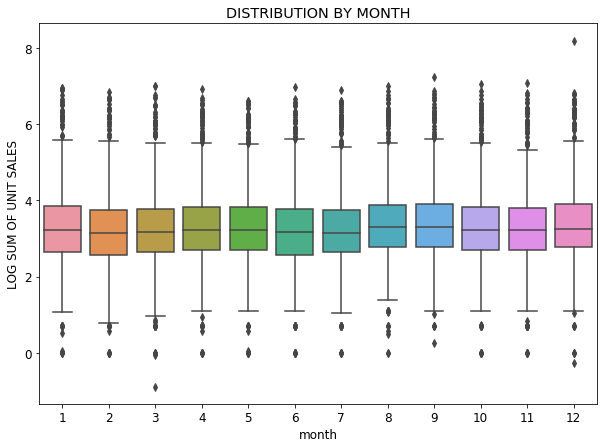

In [37]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,7))

Toal_month=sns.boxplot(x=df_44_100['month'], y=np.log(df_44_100['unit_sales']))
#sns.lineplot(month_sum['month']-1, month_sum['unit_sales'])
plt.title('DISTRIBUTION BY MONTH')
plt.ylabel('LOG SUM OF UNIT SALES')

fig=Toal_month.get_figure()
fig.savefig('Toal_month.png')

C:\Users\ZVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'DAYS OF WEEK')

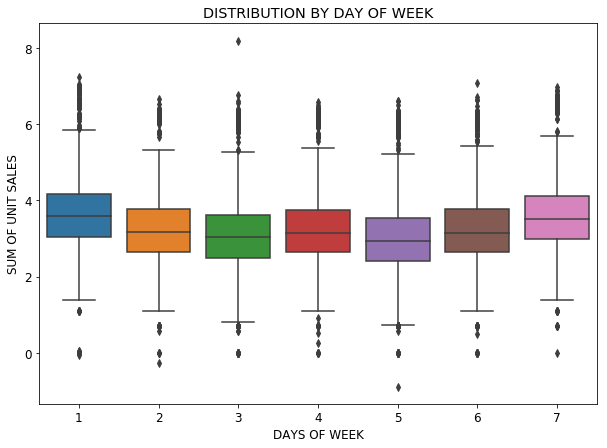

In [78]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,7))
sns.boxplot(x=df_44_100['day_of_week'], y=np.log(df_44_100['unit_sales']))
plt.title('DISTRIBUTION BY DAY OF WEEK')
plt.ylabel('SUM OF UNIT SALES')
plt.xlabel('DAYS OF WEEK')


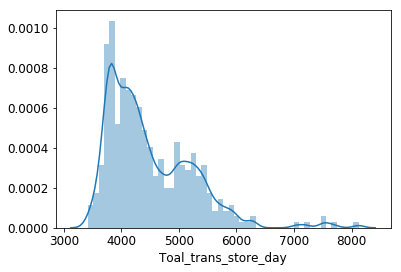

In [41]:
Toal_trans_store_day_BL = sns.distplot(df_44_100['Toal_trans_store_day'])

fig=Toal_trans_store_day_BL.get_figure()
fig.savefig('Toal_trans_store_day_BL.png')


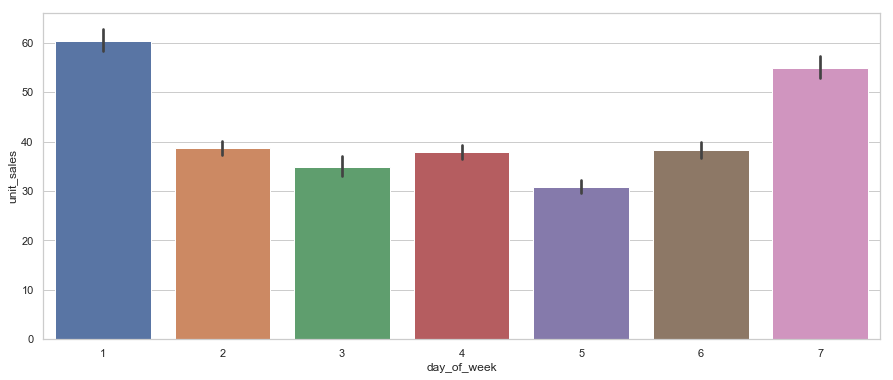

In [412]:
#import seaborn as sns
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
 = sns.barplot(x="day_of_week", y="unit_sales", data=df_44_100)

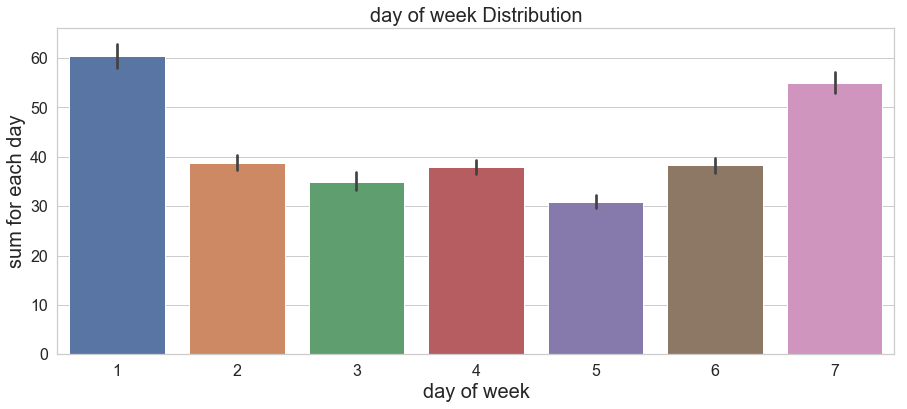

In [415]:
#Set the plot figure
plt.figure(figsize=(15,6))
# Create the plot title

# Plot the data
#day_of_week_distribution=sns.countplot(data=df_44_100, x='day_of_week')
day_of_week_distribution= sns.barplot(x="day_of_week", y="unit_sales", data=df_44_100)
# Rotate the name of the states
plt.xticks(rotation=0, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.title('day of week Distribution', fontsize=20)
plt.ylabel('sum for each day', fontsize=20)
plt.xlabel('day of week', fontsize=20)
fig=day_of_week_distribution.get_figure()
fig.savefig('day_of_week_distribution.png')

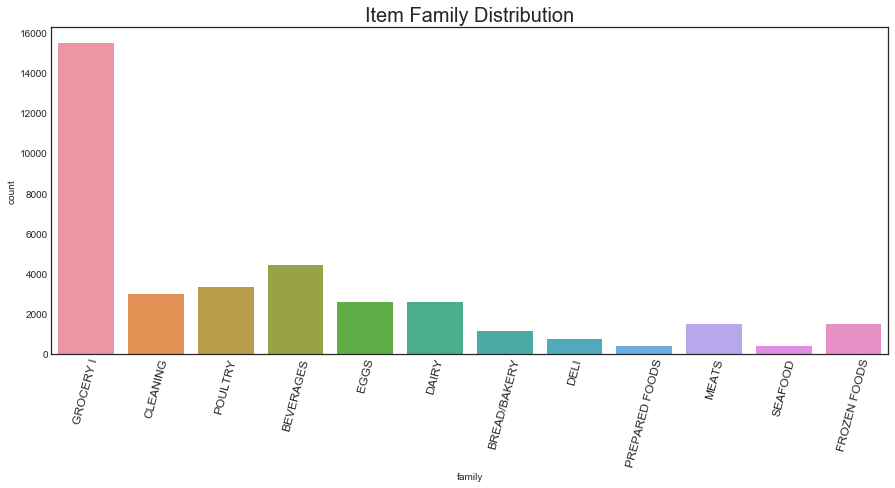

In [391]:
#Set the plot figure
plt.figure(figsize=(15,6))
# Create the plot title
plt.title('Item Family Distribution', fontsize=20)
# Plot the data
Family_distribution=sns.countplot(data=df_44_100, x='family')
# Rotate the name of the states
plt.xticks(rotation=75, fontsize=12)

fig=Family_distribution.get_figure()
fig.savefig('Family_distribution.png')

In [49]:
numeric_var = ['date','dcoilwtico','day_of_week','month','Toal_trans_store_day','unit_sales']


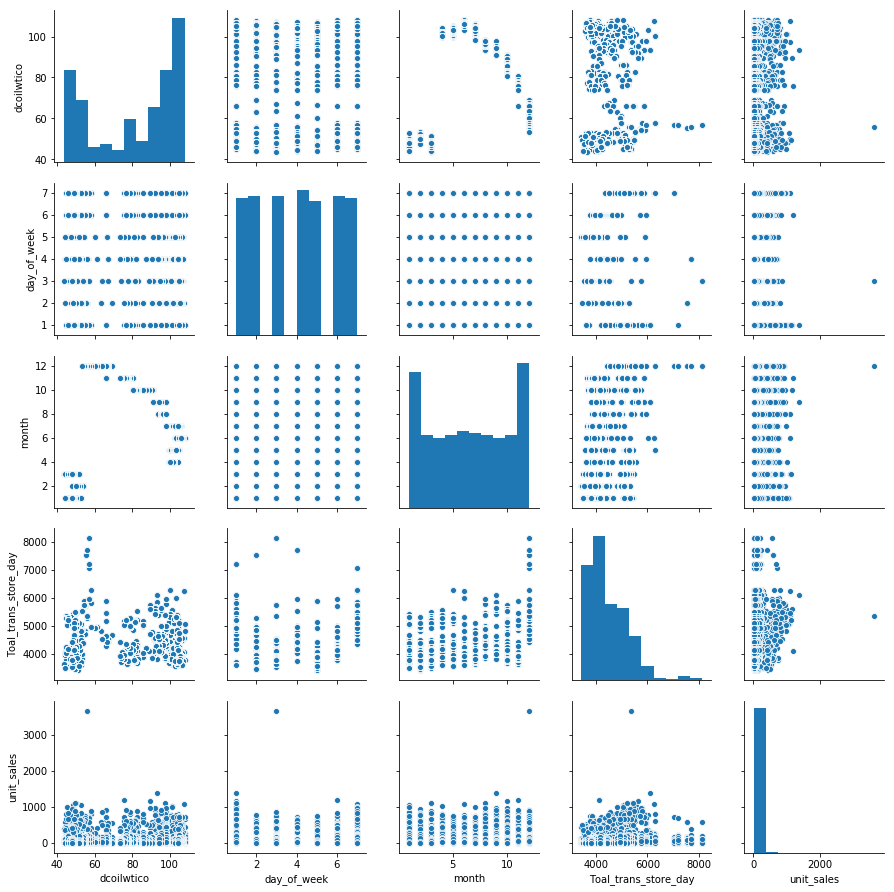

In [50]:
sns.pairplot(FF_X[numeric_var])

In [392]:
df_44_100

,date,month,day_of_week,season,store_nbr,item_nbr,Toal_trans_store_day,city,city_population,state,type,cluster,family,class,LocalHoliday,RegionalHoliday,NationalHoliday,unit_sales,onpromotion,dcoilwtico,perishable,is_pay_day_m2,is_pay_day_m1,is_pay_day,is_pay_day_p1,is_pay_day_p2
0,2014-04-01,4,3,spring,44,108797,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1004,0,0,0,17.00,0,99.69,0,0,0,0,1,0
1,2014-04-01,4,3,spring,44,115693,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1040,0,0,0,10.00,0,99.69,0,0,0,0,1,0
2,2014-04-01,4,3,spring,44,119024,4158,Quito,1399814,Pichincha,A,5,CLEANING,3026,0,0,0,26.00,0,99.69,0,0,0,0,1,0
3,2014-04-01,4,3,spring,44,129297,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1032,0,0,0,4.00,0,99.69,0,0,0,0,1,0
4,2014-04-01,4,3,spring,44,129758,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1032,0,0,0,11.00,0,99.69,0,0,0,0,1,0
5,2014-04-01,4,3,spring,44,159156,4158,Quito,1399814,Pichincha,A,5,POULTRY,2416,0,0,0,56.08,0,99.69,1,0,0,0,1,0
6,2014-04-01,4,3,spring,44,164037,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1048,0,0,0,15.00,0,99.69,0,0,0,0,1,0
7,2014-04-01,4,3,spring,44,174081,4158,Quito,1399814,Pichincha,A,5,BEVERAGES,1136,0,0,0,30.00,0,99.69,0,0,0,0,1,0
8,2014-04-01,4,3,spring,44,208384,4158,Quito,1399814,Pichincha,A,5,EGGS,2502,0,0,0,55.00,0,99.69,1,0,0,0,1,0
9,2014-04-01,4,3,spring,44,213652,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1048,0,0,0,43.00,0,99.69,0,0,0,0,1,0


In [506]:
FF_X_GRAPH

,date,month,day_of_week,season,store_nbr,item_nbr,Toal_trans_store_day,city,city_population,state,type,cluster,family,class,LocalHoliday,RegionalHoliday,NationalHoliday,unit_sales,onpromotion,dcoilwtico_x,perishable,is_pay_day_m2,is_pay_day_m1,is_pay_day,is_pay_day_p1,is_pay_day_p2,dcoilwtico_y,dcoilwtico_15,dcoilwtico_30,ratio_curr_15,ratio_curr_30
0,2014-04-01,4,3,spring,44,108797,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1004,0,0,0,17.00,0,99.69,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97
1,2014-04-01,4,3,spring,44,115693,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1040,0,0,0,10.00,0,99.69,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97
2,2014-04-01,4,3,spring,44,119024,4158,Quito,1399814,Pichincha,A,5,CLEANING,3026,0,0,0,26.00,0,99.69,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97
3,2014-04-01,4,3,spring,44,129297,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1032,0,0,0,4.00,0,99.69,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97
4,2014-04-01,4,3,spring,44,129758,4158,Quito,1399814,Pichincha,A,5,GROCERY I,1032,0,0,0,11.00,0,99.69,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36895,2015-03-31,3,3,spring,44,1239880,3787,Quito,1399814,Pichincha,A,5,POULTRY,2420,0,0,0,12.43,0,47.72,1,0,0,1,0,0,47.72,43.93,49.84,1.09,0.96
36896,2015-03-31,3,3,spring,44,1239897,3787,Quito,1399814,Pichincha,A,5,POULTRY,2420,0,0,0,73.20,0,47.72,1,0,0,1,0,0,47.72,43.93,49.84,1.09,0.96
36897,2015-03-31,3,3,spring,44,1239901,3787,Quito,1399814,Pichincha,A,5,POULTRY,2420,0,0,0,45.09,0,47.72,1,0,0,1,0,0,47.72,43.93,49.84,1.09,0.96
36898,2015-03-31,3,3,spring,44,1239903,3787,Quito,1399814,Pichincha,A,5,POULTRY,2420,0,0,0,11.38,0,47.72,1,0,0,1,0,0,47.72,43.93,49.84,1.09,0.96


Text(0, 0.5, 'Oil Price')

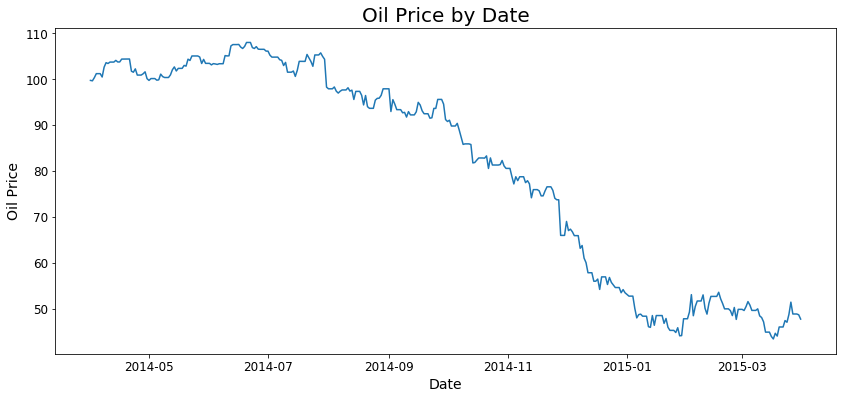

In [45]:
#set the plot size
plt.figure(figsize=(14,6))
# Create the plot title
plt.title('Oil Price by Date', fontsize=20)
# Plot total unit sales
plt.plot(FF_X.date, FF_X.dcoilwtico)

# Set the labels
plt.xlabel('Date',fontsize=14)
plt.ylabel('Oil Price',fontsize=14)

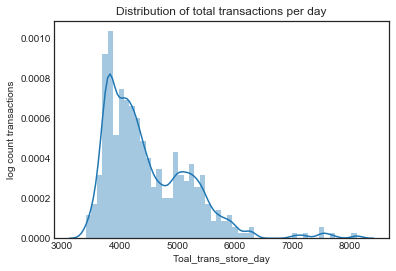

In [366]:
Toal_trans_store_day=sns.distplot(df_44_100['Toal_trans_store_day'])

#ax = sns.boxplot('Day', 'Count', data= gg)

Toal_trans_store_day.set_title('Distribution of total transactions per day')
Toal_trans_store_day.set_ylabel('log count transactions')

fig=Toal_trans_store_day.get_figure()
fig.savefig('Toal_trans_store_day.png')



## Univariate Outlier detection for continuous numeric variables
 
#### Using Standard Deviation (z-scores)

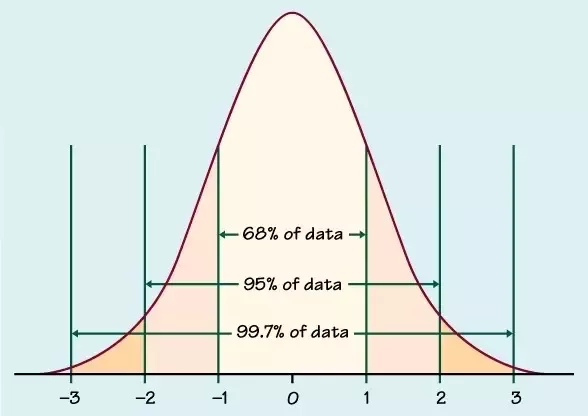

#### Using median and Interquartile range (Boxplot)

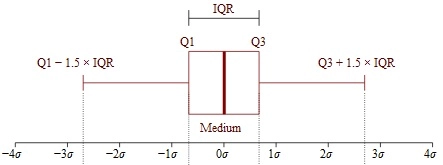

In [46]:
def zscore_outliers(x, cutoff=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    dmean = x.mean()
    dsd = x.std()
    rng = dsd * cutoff
    lower = dmean - rng
    upper = dmean + rng
    if return_thresholds:
        return lower, upper
    else:
        return [True if z < lower or z > upper else False for z in x]


def iqr_outliers(x, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25 = np.percentile(x, 25)
    q75 = np.percentile(x, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if z < lower or z > upper else False for z in x]

In [65]:
out1 = zscore_outliers(FF_X['unit_sales'], cutoff=3, return_thresholds=False)
np.sum(out1)


456

Text(0.5, 0, 'day of week')

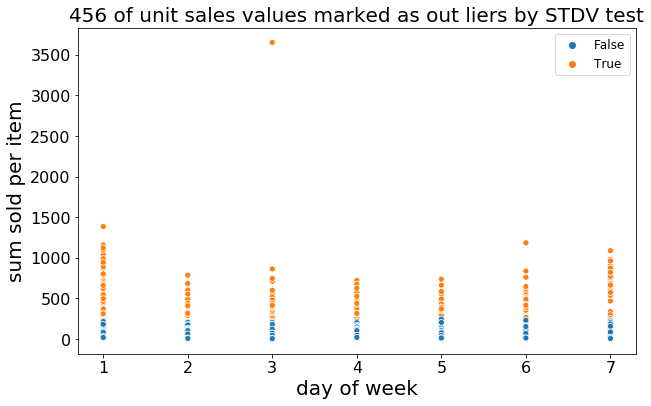

In [75]:
plt.figure(figsize=(10,6))

plt.xticks(rotation=0, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.title('456 of unit sales values marked as out liers by STDV test', fontsize=20)

sns.scatterplot(x=FF_X['day_of_week'],y=FF_X['unit_sales'],hue=out1) 
plt.ylabel('sum sold per item', fontsize=20)
plt.xlabel('day of week', fontsize=20)



In [76]:
out3 = zscore_outliers(FF_X['unit_sales'], cutoff=3, return_thresholds=True)
np.sum(out3)

84.56176372259364

In [52]:
zscore_outliers(FF_X['unit_sales'], return_thresholds=True)

(-161.2428063155219, 245.80457003811554)

In [53]:
zscore_outliers(FF_X['unit_sales'], return_thresholds=True)

(-161.2428063155219, 245.80457003811554)

In [54]:
out2 = iqr_outliers(FF_X['unit_sales'], k=1.25, return_thresholds=False)
np.sum(out2)  

3948

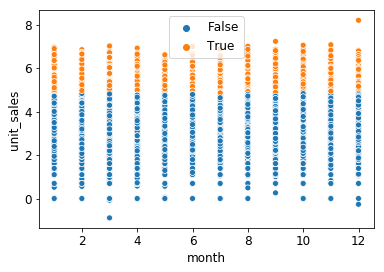

In [57]:
sns.scatterplot(x=FF_X['month'],y=np.log(FF_X['unit_sales']),hue=out1) 

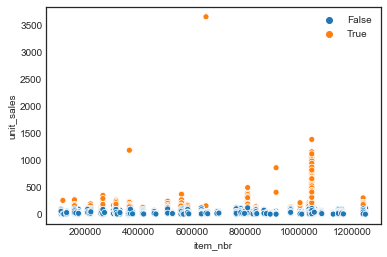

In [126]:
sns.scatterplot(x=FF_X['item_nbr'],y=FF_X['unit_sales'],hue=out1) 

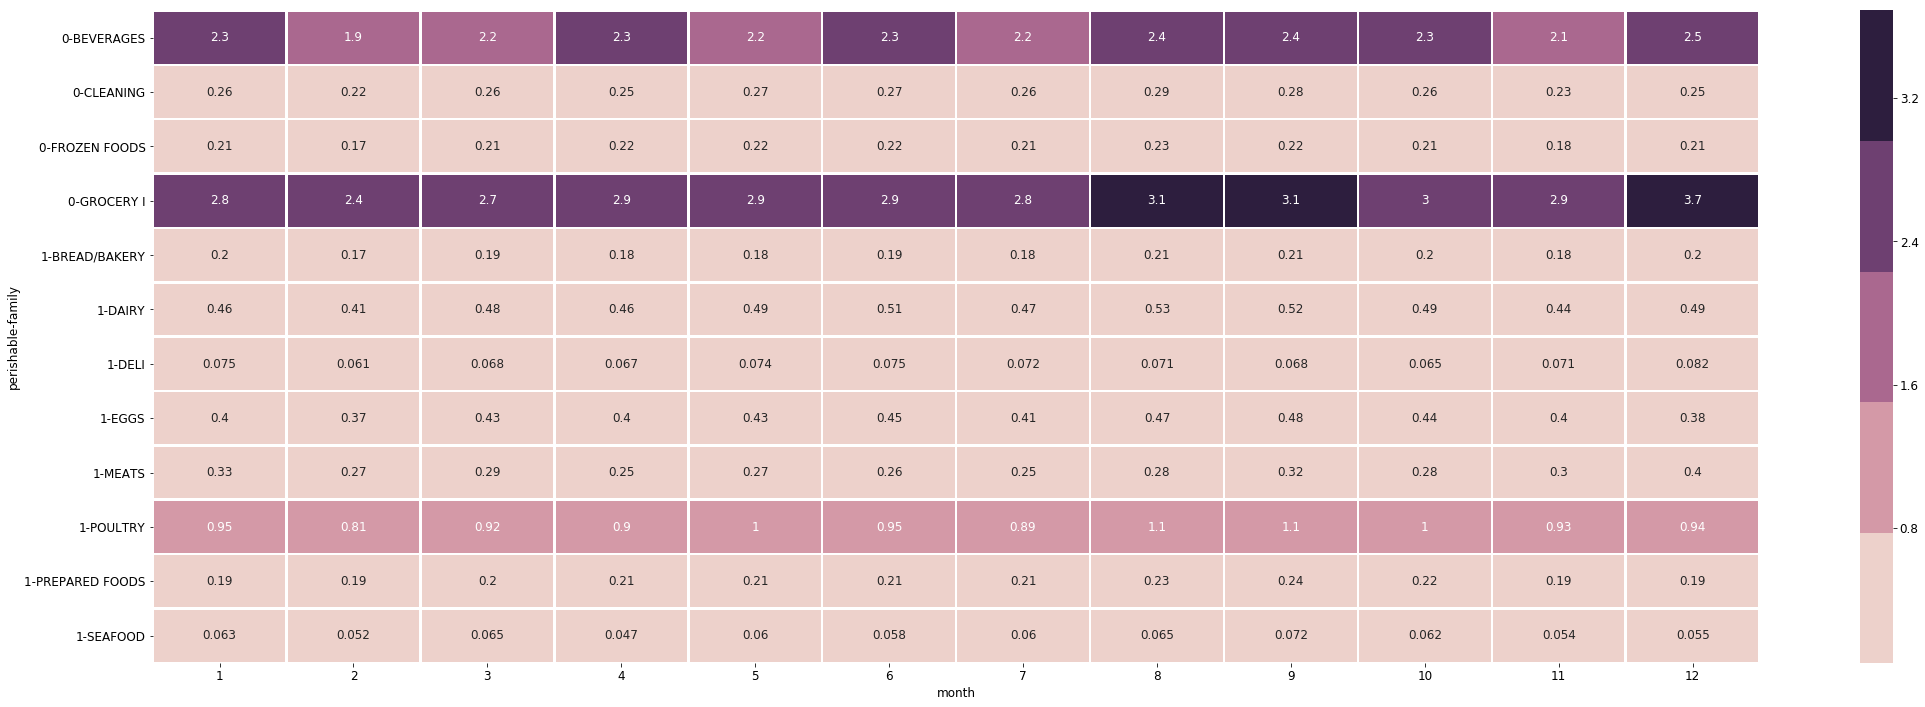

In [61]:
#77777
total_unit_sale = FF_X.unit_sales.sum()
Cross_t= pd.crosstab(index=[FF_X['perishable'],FF_X['family']],columns=[FF_X['month']],margins=False,\
                     values=FF_X['unit_sales']/total_unit_sale*100,aggfunc='sum')
fig, ax = plt.subplots(figsize=(3*len(FF_X['month'].unique()),len(FF_X['family'].unique())))
a=sns.heatmap(Cross_t,annot=True,linewidths=1.5,ax=ax,cmap=sns.cubehelix_palette(5))

fig=a.get_figure()
fig.savefig('a.png')

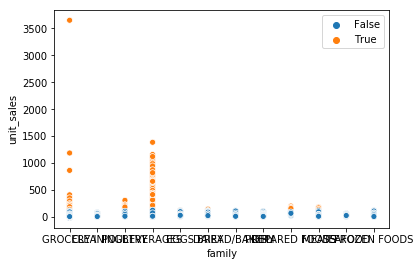

In [188]:
sns.scatterplot(x=FF_X['family'],y=FF_X['unit_sales'] ,hue=out3)

## Multivariate Outlier Analysis

For multivariate outlier detection we can use DBSCAN. This algorithm search for aggregation of points that are combined and leave out of them the outlier points.

<img src="https://en.proft.me/media/science/r_dbc_points.png"> </img>



In [133]:
## X is an numpy array
def dbscan_mvoutliers(X):
    from sklearn.cluster import DBSCAN
    from sklearn.preprocessing import StandardScaler
    # scale data first
    X = StandardScaler().fit_transform(X.values)

    db = DBSCAN(eps=3.0, min_samples=10).fit(X)
    labels = db.labels_

    plt.figure(figsize=(10,10))

    unique_labels = set(labels)
    colors = ['blue', 'red']

    for color,label in zip(colors, unique_labels):
        sample_mask = [True if l == label else False for l in labels]
        plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
    plt.xlabel('x');
    plt.ylabel('y');
    return(db)

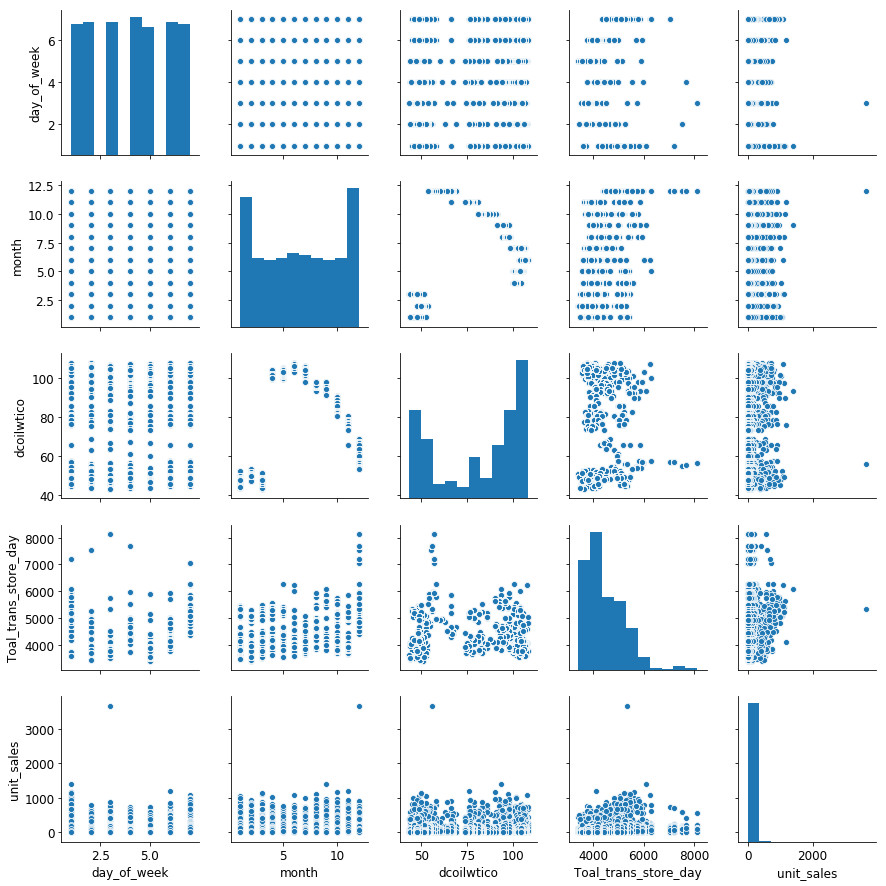

In [62]:
sns.pairplot(FF_X,vars=['day_of_week','month','dcoilwtico','Toal_trans_store_day','unit_sales'])

In [135]:
X_cat_sample2 = FF_X[['dcoilwtico','Toal_trans_store_day','unit_sales']]


In [158]:
X_cat_sample2.describe()

,dcoilwtico,Toal_trans_store_day,unit_sales
count,"36,899","36,899","36,899"
mean,81,"4,493",42
std,23,751,68
min,43,"3,416",0
25%,54,"3,912",15
50%,92,"4,275",25
75%,102,"4,984",46
max,108,"8,120","3,652"


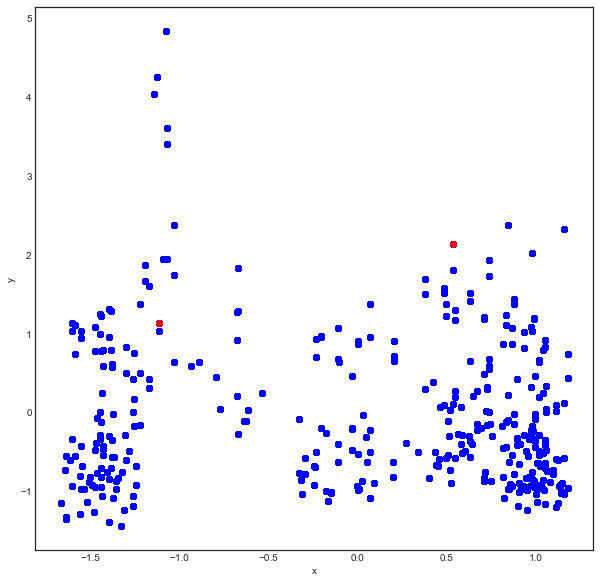

In [136]:
dbsc1 = dbscan_mvoutliers(X_cat_sample2)

In [137]:
dbsc1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
FF_X['outliers']=dbsc1.labels_

In [139]:
FF_X.loc[FF_X['outliers']!=0]

,date,month,day_of_week,season,item_nbr,Toal_trans_store_day,family,class,LocalHoliday,RegionalHoliday,NationalHoliday,unit_sales,onpromotion,perishable,is_pay_day_m2,is_pay_day_m1,is_pay_day,is_pay_day_p1,is_pay_day_p2,dcoilwtico,dcoilwtico_15,dcoilwtico_30,ratio_curr_15,ratio_curr_30,outliers
16378,2014-09-07,9,1,summer,1047679,6099,BEVERAGES,1120,0,0,0,"1,385",0,0,0,0,0,0,0,93,94,98,1,1,-1
26350,2014-12-16,12,3,autumn,651523,5343,GROCERY I,1004,0,0,0,"3,652",0,0,0,0,0,1,0,56,69,76,1,1,-1


In [162]:
FF_X_BEFORE_DEL_OL = FF_X.copy()
print(FF_X.shape)
FF_X=FF_X.loc[FF_X['outliers']==0]
print(FF_X.shape)

(36899, 25)
(36897, 25)


In [141]:
dbsc1

DBSCAN(algorithm='auto', eps=3.0, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

### Treating outliers: To drop or not to drop?
 
- If it is obviously due to incorrectly entered or measured data,  drop it 
- If it does not change the results but does affect assumptions, drop it (report!)
- If it affects both results and assumptions. Don’t drop it. (Analyze with and without. Report!)
- If it creates a significant association, drop it



In [142]:
np.sum(dbsc1.labels_)

-2

In [77]:
outliers = dbsc1

In [146]:
outliers1 = dbsc1.labels_
outliers1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
#### delete the row for mv outlier
X = FF_X.loc[-outliers.labels_,]
X.iloc[outlier_index,'ct'] = np.nan

In [148]:
X_cat_sample2

,dcoilwtico,Toal_trans_store_day,unit_sales,outliers
0,100,4158,17,0
1,100,4158,10,0
2,100,4158,26,0
3,100,4158,4,0
4,100,4158,11,0
5,100,4158,56,0
6,100,4158,15,0
7,100,4158,30,0
8,100,4158,55,0
9,100,4158,43,0


In [149]:
#X_cat_sample2['outliers'] = outliers1.astype('int64')

for c in X_cat_sample2.columns:
    v1 = X_cat_sample2.loc[X_cat_sample2[c]==0,c]
    v2 = X_cat_sample2.loc[:,c]
    print([c,v1.mean(),v2.mean(),X_cat_sample2[c].sum()])
    
#X * outliers.astype('int64')

['dcoilwtico', nan, 81.18097834631328, 2995496.9199999995]
['Toal_trans_store_day', nan, 4493.264749722215, 165796976]
['unit_sales', nan, 42.28088186129683, 1560122.2598]
['outliers', 0.0, -5.420201089460419e-05, -2]


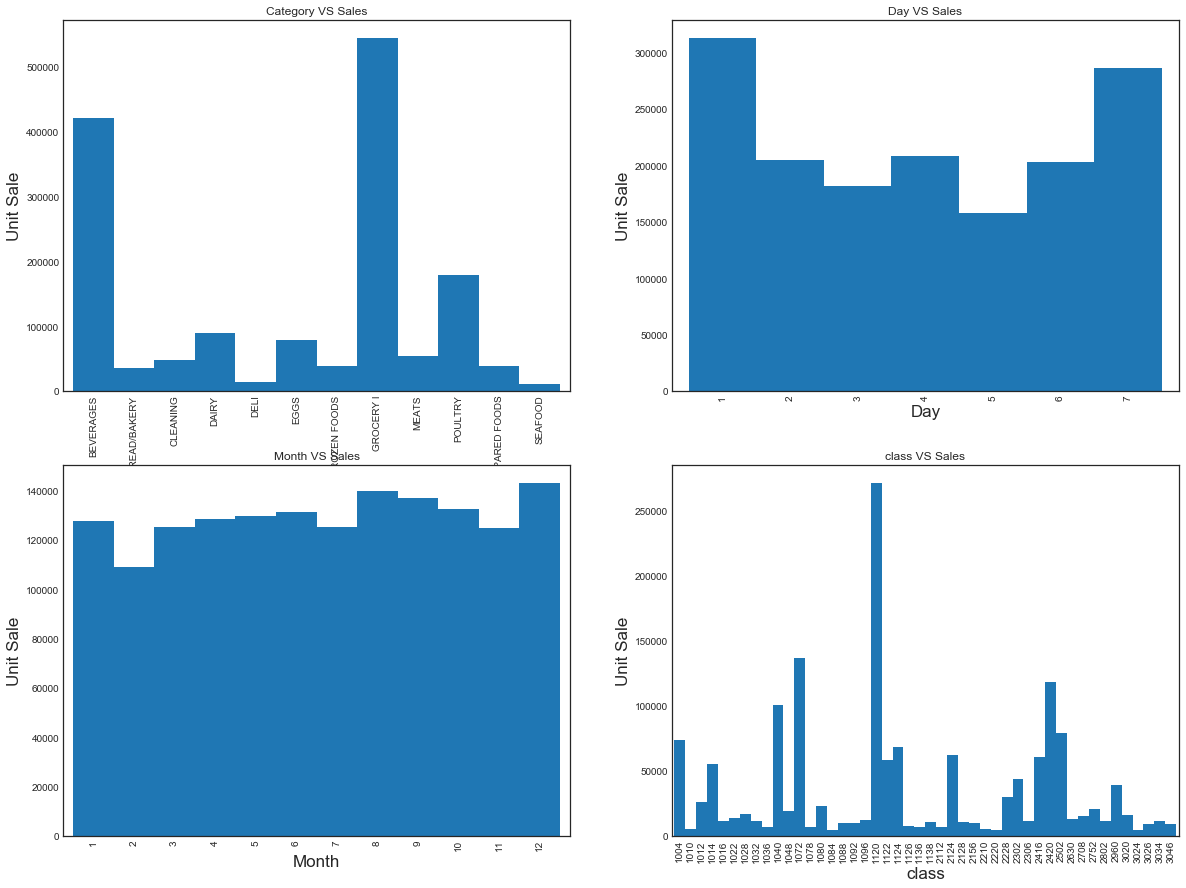

In [153]:
fig = plt.figure(figsize=(20,15))

ax=fig.add_subplot(221)
FF_X.groupby("family").sum()['unit_sales'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax)
plt.xlabel("Category",fontsize=17)
plt.ylabel("Unit Sale",fontsize=17)
plt.title("Category VS Sales")

ax2=fig.add_subplot(222)
FF_X.groupby("day_of_week").sum()['unit_sales'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax2)
plt.xlabel("Day",fontsize=17)
plt.ylabel("Unit Sale",fontsize=17)
plt.title("Day VS Sales")
#plt.ylim(0,25000)

ax3=fig.add_subplot(223)
FF_X.groupby("month").sum()['unit_sales'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax3)
plt.xlabel("Month",fontsize=17)
plt.ylabel("Unit Sale",fontsize=17)
plt.title("Month VS Sales")

ax4=fig.add_subplot(224)
FF_X.groupby("class").sum()['unit_sales'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax4)
plt.xlabel("class",fontsize=17)
plt.ylabel("Unit Sale",fontsize=17)
plt.title("class VS Sales")

plt.savefig('N_VS_weight_unit_sale.png')


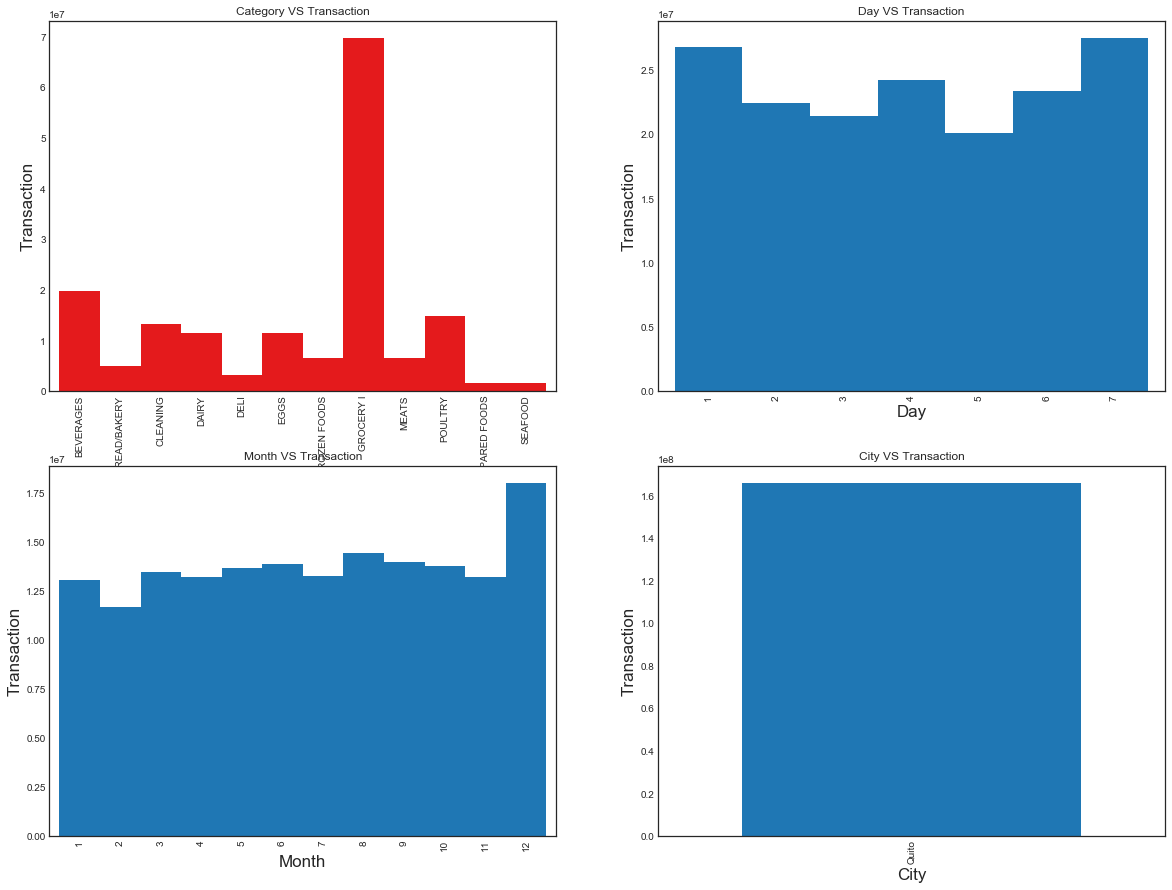

In [89]:
fig1 = plt.figure(figsize=(20,15))

ax=fig1.add_subplot(221)
FF_X.groupby("family").sum()['Toal_trans_store_day'].plot(kind='bar', width=1, ax=ax,cmap='Set1')
plt.xlabel("Category",fontsize=17)
plt.ylabel("Transaction",fontsize=17)
plt.title("Category VS Transaction")


ax2=fig1.add_subplot(222)
FF_X.groupby("day_of_week").sum()['Toal_trans_store_day'].plot(kind='bar', width=1, ax=ax2)
plt.xlabel("Day",fontsize=17)
plt.ylabel("Transaction",fontsize=17)
plt.title("Day VS Transaction")
#plt.ylim(0,25000)

ax3=fig1.add_subplot(223)
FF_X.groupby("month").sum()['Toal_trans_store_day'].plot(kind='bar', width=1, ax=ax3)
plt.xlabel("Month",fontsize=17)
plt.ylabel("Transaction",fontsize=17)
plt.title("Month VS Transaction")

ax4=fig1.add_subplot(224)
FF_X.groupby("city").sum()['Toal_trans_store_day'].plot(kind='bar', width=1, ax=ax4)
plt.xlabel("City",fontsize=17)
plt.ylabel("Transaction",fontsize=17)
plt.title("City VS Transaction")

plt.savefig('N_VS_Toal_trans_store_day.png')


In [110]:
varnm = ['Toal_trans_store_day','dcoilwtico','unit_sales']

# Feature Selection Strategy

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
from importlib import reload
import pyTable1 as tbl1

import matplotlib.pyplot as plt

import pyMechkar as mechkar
#reload(tb1)
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
%matplotlib inline

In [82]:
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_colwidth',500)
pd.set_option('display.precision',6)
pd.options.display.float_format = '{0:,.2f}'.format

In [83]:
for col in ['LocalHoliday','RegionalHoliday','NationalHoliday','onpromotion','perishable','is_pay_day_m2','is_pay_day_m1',
            'is_pay_day','is_pay_day_p1','is_pay_day_p2']:
    FF_X[col] = FF_X[col].astype('int64')


In [84]:
for col in ['class','month','day_of_week','season','family']:
    FF_X[col] = FF_X[col].astype('category')

In [85]:
pd.set_option('display.max_rows',150)
FF_X.dtypes

date                    datetime64[ns]
month                         category
day_of_week                   category
season                        category
item_nbr                         int64
Toal_trans_store_day             int64
family                        category
class                         category
LocalHoliday                     int64
RegionalHoliday                  int64
NationalHoliday                  int64
unit_sales                     float64
onpromotion                      int64
perishable                       int64
is_pay_day_m2                    int64
is_pay_day_m1                    int64
is_pay_day                       int64
is_pay_day_p1                    int64
is_pay_day_p2                    int64
dcoilwtico                     float64
dcoilwtico_15                  float64
dcoilwtico_30                  float64
ratio_curr_15                  float64
ratio_curr_30                  float64
dtype: object

In [86]:
FF_X=FF_X.loc[:, FF_X.columns != 'date']
FF_X=FF_X.loc[:, FF_X.columns != 'item_nbr']


In [87]:
FF_X=pd.get_dummies(FF_X, drop_first = True )

In [88]:
pd.set_option('display.max_rows',10)
FF_X.head()

,Toal_trans_store_day,LocalHoliday,RegionalHoliday,NationalHoliday,unit_sales,onpromotion,perishable,is_pay_day_m2,is_pay_day_m1,is_pay_day,is_pay_day_p1,is_pay_day_p2,dcoilwtico,dcoilwtico_15,dcoilwtico_30,ratio_curr_15,ratio_curr_30,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,season_spring,season_summer,season_winter,family_BREAD/BAKERY,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_MEATS,family_POULTRY,family_PREPARED FOODS,family_SEAFOOD,class_1010,class_1012,class_1014,class_1016,class_1022,class_1028,class_1032,class_1036,class_1040,class_1048,class_1072,class_1078,class_1080,class_1084,class_1088,class_1092,class_1096,class_1120,class_1122,class_1124,class_1126,class_1136,class_1138,class_2112,class_2124,class_2128,class_2156,class_2210,class_2220,class_2228,class_2302,class_2306,class_2416,class_2420,class_2502,class_2630,class_2708,class_2752,class_2802,class_2960,class_3020,class_3024,class_3026,class_3034,class_3046
0,4158,0,0,0,17.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4158,0,0,0,10.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4158,0,0,0,26.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4158,0,0,0,4.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4158,0,0,0,11.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Variable Selection using

## Univariable Analysis

## Multivariable Analysis

In [89]:
X_Reg =FF_X.loc[:, FF_X.columns != 'unit_sales']
Y_Reg =FF_X.loc[:, FF_X.columns == 'unit_sales']
Y_Reg=np.ravel(Y_Reg)
print(Y_Reg.shape)
print(' ')
print (X_Reg.shape,Y_Reg.shape)
print(' ')
print('CREATE VARIABLE SELECTION ARRAY')
print(' ')
varSel_3 = pd.DataFrame({'Variable': X_Reg.columns[:]}) 
varSel_3

(36899,)
 
(36899, 92) (36899,)
 
CREATE VARIABLE SELECTION ARRAY
 


,Variable
0,Toal_trans_store_day
1,LocalHoliday
2,RegionalHoliday
3,NationalHoliday
4,onpromotion
...,...
87,class_3020
88,class_3024
89,class_3026
90,class_3034


# Linear Regression

In [90]:
regr = linear_model.LinearRegression(normalize=True)
Result = regr.fit(X_Reg, Y_Reg,)
print('')

print(Result)
print('')
model_1 = SelectFromModel(Result, prefit=True)
model_1.get_support()
varSel_3['LinearRegression'] = model_1.get_support().astype('int64')
varSel_3


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)



,Variable,LinearRegression
0,Toal_trans_store_day,0
1,LocalHoliday,0
2,RegionalHoliday,1
3,NationalHoliday,0
4,onpromotion,0
...,...,...
87,class_3020,0
88,class_3024,0
89,class_3026,0
90,class_3034,0


#  LASSO (L1 penalization)

In [91]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lassomod = Lasso(alpha=0.01).fit(X_Reg, Y_Reg)
print('')
print(lassomod)
print('')
model_2 = SelectFromModel(lassomod, prefit=True)
model_2.get_support()
varSel_3['Lasso'] = model_2.get_support().astype('int64')
pd.set_option('display.max_rows',10)
varSel_3


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)



,Variable,LinearRegression,Lasso
0,Toal_trans_store_day,0,1
1,LocalHoliday,0,1
2,RegionalHoliday,1,0
3,NationalHoliday,0,1
4,onpromotion,0,1
...,...,...,...
87,class_3020,0,0
88,class_3024,0,1
89,class_3026,0,1
90,class_3034,0,1


# Random Forest For Regression

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

regr = RandomForestRegressor(random_state=0,n_estimators=20)
rf=regr.fit(X_Reg,Y_Reg)
print('')
print(rf)
print('')
model_3 = SelectFromModel(regr, prefit=True)
model_3.get_support()
varSel_3['RandomForest'] = model_3.get_support().astype('int64')
varSel_3



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)



,Variable,LinearRegression,Lasso,RandomForest
0,Toal_trans_store_day,0,1,1
1,LocalHoliday,0,1,0
2,RegionalHoliday,1,0,0
3,NationalHoliday,0,1,0
4,onpromotion,0,1,0
...,...,...,...,...
87,class_3020,0,0,0
88,class_3024,0,1,0
89,class_3026,0,1,0
90,class_3034,0,1,0


# Gradient Boosting Reggression

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel

gbmod = GradientBoostingRegressor().fit(X_Reg,Y_Reg)
print('')
print(gbmod)
print('')
model_4 = SelectFromModel(gbmod, prefit=True)
model_4.get_support()
varSel_3['GradientBoost'] = model_4.get_support().astype('int64')
varSel_3



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)



,Variable,LinearRegression,Lasso,RandomForest,GradientBoost
0,Toal_trans_store_day,0,1,1,1
1,LocalHoliday,0,1,0,0
2,RegionalHoliday,1,0,0,0
3,NationalHoliday,0,1,0,0
4,onpromotion,0,1,0,0
...,...,...,...,...,...
87,class_3020,0,0,0,0
88,class_3024,0,1,0,0
89,class_3026,0,1,0,0
90,class_3034,0,1,0,0


# SVM.LinearSVR  - For Regression

In [94]:
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel

svmmod = LinearSVR(epsilon=0.1, tol=0.0001, C=1.0).fit(X_Reg, Y_Reg)
print('')
print(svmmod)
print('')
model_5 = SelectFromModel(svmmod, prefit=True)
model_5.get_support()
varSel_3['SVR'] = model_5.get_support().astype('int64')
varSel_3


LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)



C:\Users\ZVI\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Variable,LinearRegression,Lasso,RandomForest,GradientBoost,SVR
0,Toal_trans_store_day,0,1,1,1,0
1,LocalHoliday,0,1,0,0,0
2,RegionalHoliday,1,0,0,0,0
3,NationalHoliday,0,1,0,0,0
4,onpromotion,0,1,0,0,0
...,...,...,...,...,...,...
87,class_3020,0,0,0,0,1
88,class_3024,0,1,0,0,0
89,class_3026,0,1,0,0,0
90,class_3034,0,1,0,0,1


## Summarization and Selection of Variables 

In [101]:
varSel_3['Sum'] =  np.sum(varSel_3,axis=1)
pd.set_option('display.max_rows',10000)
varSel_3

,Variable,LinearRegression,Lasso,RandomForest,GradientBoost,SVR,Sum
0,Toal_trans_store_day,0,1,1,1,0,3
1,LocalHoliday,0,1,0,0,0,1
2,RegionalHoliday,1,0,0,0,0,1
3,NationalHoliday,0,1,0,0,0,1
4,onpromotion,0,1,0,0,0,1
5,perishable,0,0,0,0,1,1
6,is_pay_day_m2,0,1,0,0,0,1
7,is_pay_day_m1,0,1,0,0,0,1
8,is_pay_day,0,1,0,0,0,1
9,is_pay_day_p1,0,1,0,0,0,1


In [102]:
varSel_3.loc[(varSel_3['Sum'] >= 3)]

,Variable,LinearRegression,Lasso,RandomForest,GradientBoost,SVR,Sum
0,Toal_trans_store_day,0,1,1,1,0,3
37,family_CLEANING,0,1,0,1,1,3
44,family_POULTRY,0,1,0,1,1,3
45,family_PREPARED FOODS,1,1,0,0,1,3
49,class_1014,0,1,1,1,1,4
57,class_1072,0,1,1,1,1,4
64,class_1120,0,1,1,1,1,4
66,class_1124,0,1,1,1,1,4
79,class_2416,0,1,1,1,1,4
86,class_2960,0,1,0,1,1,3


# a משתנים מ3 ומעלה אל משתנה 

In [103]:
pd.set_option('display.max_rows',39)

selected_vars=varSel_3.loc[(varSel_3['Sum'] >= 3)]
print('The Number Of Features Selected For Predictions Models : ',len(selected_vars))


The Number Of Features Selected For Predictions Models :  10


# DATA PREPERATION

In [104]:
pd.set_option('display.max_rows',39)
selected_vars_lables=selected_vars['Variable'].loc[(selected_vars['Variable'] != 3)].tolist()
selected_vars_lables
#pd.set_option('display.max_rows',10)

['Toal_trans_store_day',
 'family_CLEANING',
 'family_POULTRY',
 'family_PREPARED FOODS',
 'class_1014',
 'class_1072',
 'class_1120',
 'class_1124',
 'class_2416',
 'class_2960']

In [105]:
pd.set_option('display.max_rows',100)

print ( 'check for number of vars if no. of models supported is >= 3 : ',len(varSel_3[(varSel_3['Sum'] >= 3)]))
print ( 'check for number of vars if no. of models supported is >= 4 : ',len(varSel_3[(varSel_3['Sum'] >= 4)]))


check for number of vars if no. of models supported is >= 3 :  10
check for number of vars if no. of models supported is >= 4 :  5


In [106]:
FF_X_FINAL1=FF_X.loc[:,['Toal_trans_store_day',
 'family_CLEANING',
 'family_DAIRY',
 'family_DELI',
 'family_EGGS',
 'family_FROZEN FOODS',
 'family_POULTRY',
 'family_PREPARED FOODS',
 'class_1014',
 'class_1072',
 'class_1120',
 'class_1124',
 'class_2306',
 'class_2416',
 'class_2502',
 'class_2708',
 'class_2960',
 'class_3034','unit_sales']]

In [209]:
FF_X_FINAL1.head(3)

,Toal_trans_store_day,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_POULTRY,family_PREPARED FOODS,class_1014,class_1072,class_1120,class_1124,class_2306,class_2416,class_2502,class_2708,class_2960,class_3034,unit_sales
0,4158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.00
1,4158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.00
2,4158,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26.00


# Preparing the partition to test, train and dev

In [107]:
import pyMechkar as mechkar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
from importlib import reload
#from pyTable1 import pyTABLE1
import pyTable1 as tb1
#if is_changed(pyTable1):
reload(tb1)

<module 'pyTable1' from 'C:\\Users\\ZVI\\pyTable1.py'>

# Automatic loop for finding the right seed

In [108]:
### The correct way!!!
from random import seed, shuffle

var_a = pd.DataFrame() 
a=3
i = 7001
while a !=0:

    seed(i)
    xind = [i for i in range(len(FF_X_FINAL1))]
    print(xind[0:15])
    shuffle(xind,)
    print(xind[0:15])

    ####################

    ### We will split as follows: 10% test, 10% dev and 80% train
    ### test split
    split_1 = int(0.1 * len(xind))
    ### train-dev split
    split_2 = int(0.2 * len(xind))

    FF_X_FINAL1['dataset'] = "train"
    FF_X_FINAL1.iloc[xind[0:split_1],len(FF_X_FINAL1.columns)-1] = "test"
    FF_X_FINAL1.iloc[xind[split_1:split_2],len(FF_X_FINAL1.columns)-1] = "dev"

    FF_X_FINAL1['dataset'] = FF_X_FINAL1['dataset'].astype('category')

    vn = FF_X_FINAL1.columns.tolist()
    tab1 = tb1.pyTABLE1(x=vn,y="dataset",data=FF_X_FINAL1,categorize=True,maxcat=7).getTable1()
    tab1.loc[(tab1['p_value']<0.05),]
    
    a=len(tab1.loc[(tab1['p_value']<0.05),])
    var_a[i-7000]=a
    #var_a.append({'activity':'partitioning data','seed number i-7779 : ':i-7779, 'iteration no.':i})
    print('seed number i or i-1 depend on break type :',i , '  AND Number of rows with p_value < 0.05:' , a )
    if i == 7050:
        break
    i += 1


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[3507, 35142, 29252, 30119, 7170, 18971, 27325, 9187, 22519, 7745, 14636, 19421, 16786, 6592, 30105]
Factorizing... please wait
*******************
[]
[********************
[********************
[********************
[]
------ Finished in 11.151590824127197econds -----
seed number i or i-1 depend on break type : 7000   AND Number of rows with p_value < 0.05: 1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[34017, 13567, 35770, 1563, 1797, 30330, 17877, 36002, 34344, 26164, 2470, 20838, 36740, 19257, 12388]
Factorizing... please wait
*******************
[]
[********************
[********************
[********************
[]
------ Finished in 11.009747743606567econds -----
seed number i or i-1 depend on break type : 7001   AND Number of rows with p_value < 0.05: 0


## Checking the partition with Table1

In [109]:
pd.set_option('display.max_rows',1000)
tab1


,Variables,Categories,Population,Category_train,Category_test,Category_dev,p_value
0,Individuals,n,36899,29520,3689,3690,nan
1,Toal_trans_store_day,Mean (SD),"4,493.30 ( 750.80)","4,494.30 ( 753.10)","4,481.30 ( 738.50)","4,496.90 ( 745.00)",0.58
2,Toal_trans_store_day,Median (IQR),"4,275.00 (3,912.00-4,984.00)","4,275.00 (3,912.00-4,984.00)","4,272.00 (3,903.00-4,974.00)","4,282.00 (3,916.00-4,984.00)",0.58
4,family_CLEANING,0,"33,947.00 ( 92.00%)","27,184.00 ( 92.10%)","3,361.00 ( 91.10%)","3,402.00 ( 92.20%)",nan
5,family_CLEANING,1,"2,952.00 ( 8.00%)","2,336.00 ( 7.90%)",328.00 ( 8.90%),288.00 ( 7.80%),0.11
6,family_DAIRY,0,"34,316.00 ( 93.00%)","27,463.00 ( 93.00%)","3,416.00 ( 92.60%)","3,437.00 ( 93.10%)",nan
7,family_DAIRY,1,"2,583.00 ( 7.00%)","2,057.00 ( 7.00%)",273.00 ( 7.40%),253.00 ( 6.90%),0.58
8,family_DELI,0,"36,161.00 ( 98.00%)","28,936.00 ( 98.00%)","3,623.00 ( 98.20%)","3,602.00 ( 97.60%)",nan
9,family_DELI,1,738.00 ( 2.00%),584.00 ( 2.00%),66.00 ( 1.80%),88.00 ( 2.40%),0.16
10,family_EGGS,0,"34,316.00 ( 93.00%)","27,451.00 ( 93.00%)","3,432.00 ( 93.00%)","3,433.00 ( 93.00%)",nan


In [110]:
tab1.loc[(tab1['p_value']<0.05),].count()

Variables         0
Categories        0
Population        0
Category_train    0
Category_test     0
Category_dev      0
p_value           0
dtype: int64

We can see that there are no variables with a p-value lower than 0.05.
 
## Proceeding with the partition

In [111]:
### We will split as follows: 10% test, 10% dev and 80% train
X_test = FF_X_FINAL1.iloc[xind[0:split_1],]
y_test = FF_X_FINAL1.iloc[xind[0:split_1],len(FF_X_FINAL1.columns)-2]

X_dev = FF_X_FINAL1.iloc[xind[split_1:split_2],]
y_dev = FF_X_FINAL1.iloc[xind[split_1:split_2],len(FF_X_FINAL1.columns)-2]

X_train = FF_X_FINAL1.iloc[xind[split_2:],]
y_train = FF_X_FINAL1.iloc[xind[split_2:],len(FF_X_FINAL1.columns)-2]


In [112]:
print(len(FF_X_FINAL1.columns)-2)
pd.set_option('display.max_rows',100)

print(' SHAPE ')
print('_____________________________')
print(X_train.shape)
print(y_train.shape)

print(X_dev.shape)
print(y_dev.shape)

print(X_test.shape)
print(y_test.shape)

print(' ')
print(' ')

y_train.isnull().sum()



18
 SHAPE 
_____________________________
(29520, 20)
(29520,)
(3690, 20)
(3690,)
(3689, 20)
(3689,)
 
 


0

In [114]:
print(' ')
print(' DROPPOING Y column FROM X DF ')
print('______________________')

X_train = X_train.drop('unit_sales',axis=1)
X_dev = X_dev.drop('unit_sales',axis=1)
X_test = X_test.drop('unit_sales',axis=1)

 
 DROPPOING Y column FROM X DF 
______________________


KeyError: "['unit_sales'] not found in axis"

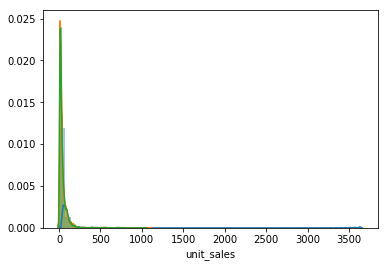

In [115]:
sns.distplot(y_train,label="train")
sns.distplot(y_dev,label="dev")
sns.distplot(y_test,label="test")

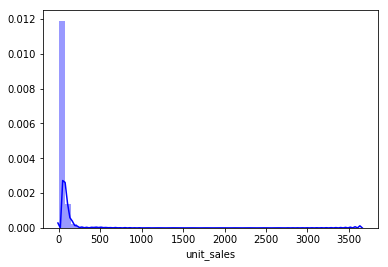

In [120]:
sns.distplot(y_train,label="train",color='blue')

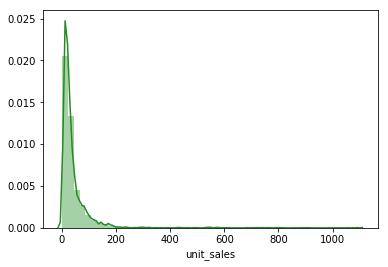

In [118]:
sns.distplot(y_dev,label="dev",color='forestGreen')

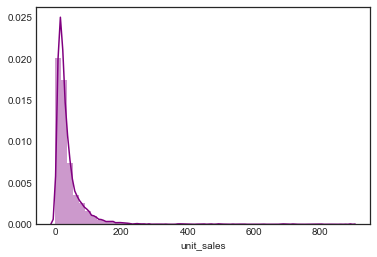

In [224]:
sns.distplot(y_test,label="test",color='purple')

In [121]:
print(' ')
print(' DROPPOING dataset column FROM X DF ')
print('______________________')

X_train = X_train.drop('dataset',axis=1)
X_dev = X_dev.drop('dataset',axis=1)
X_test = X_test.drop('dataset',axis=1)
print(X_train.shape)
print(y_train.shape)

print(X_dev.shape)
print(y_dev.shape)

print(X_test.shape)
print(y_test.shape)

 
 DROPPOING dataset column FROM X DF 
______________________
(29520, 18)
(29520,)
(3690, 18)
(3690,)
(3689, 18)
(3689,)


In [122]:
FF_X.head()

,Toal_trans_store_day,LocalHoliday,RegionalHoliday,NationalHoliday,unit_sales,onpromotion,perishable,is_pay_day_m2,is_pay_day_m1,is_pay_day,is_pay_day_p1,is_pay_day_p2,dcoilwtico,dcoilwtico_15,dcoilwtico_30,ratio_curr_15,ratio_curr_30,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,season_spring,season_summer,season_winter,family_BREAD/BAKERY,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_MEATS,family_POULTRY,family_PREPARED FOODS,family_SEAFOOD,class_1010,class_1012,class_1014,class_1016,class_1022,class_1028,class_1032,class_1036,class_1040,class_1048,class_1072,class_1078,class_1080,class_1084,class_1088,class_1092,class_1096,class_1120,class_1122,class_1124,class_1126,class_1136,class_1138,class_2112,class_2124,class_2128,class_2156,class_2210,class_2220,class_2228,class_2302,class_2306,class_2416,class_2420,class_2502,class_2630,class_2708,class_2752,class_2802,class_2960,class_3020,class_3024,class_3026,class_3034,class_3046
0,4158,0,0,0,17.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4158,0,0,0,10.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4158,0,0,0,26.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4158,0,0,0,4.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4158,0,0,0,11.00,0,0,0,0,0,1,0,99.69,98.43,102.88,1.01,0.97,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
FF_X_bck=FF_X.copy()

In [124]:

import pyMechkar as mechkar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
from importlib import reload
#from pyTable1 import pyTABLE1
import pyTable1 as tb1
#if is_changed(pyTable1):
reload(tb1)### The correct way!!!
from random import seed, shuffle
import time
    #init = time.time()


In [125]:
from sklearn.svm import SVR  #import both the Linear and SVM classifier
from sklearn.svm import LinearSVR
#from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score #### For Clasification Models

import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree


In [126]:
## error = sum of squared errors (SSE)
def error(predicted, observed):
    err = sum(np.subtract(predicted, observed)**2)
    return(err)

# PREDICTIONS

## L2 regularization - Ridge

In [175]:
from sklearn.linear_model import Ridge

alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10] # [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=53)
    ridge.fit(X_train, y_train)
    # calculate errors
    new_train_error = mean_squared_error(y_dev, ridge.predict(X_dev))
    new_validation_error = mean_squared_error(y_dev, ridge.predict(X_dev))
    new_dev_error = mean_squared_error(y_dev, ridge.predict(X_dev))
    # print errors as report
    print('alpha: {:7} | train error: {:5} | val error: {:6} | dev error: {}'.
          format(alpha,
                 round(new_train_error,3),
                 round(new_validation_error,3),
                 round(new_dev_error,3)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   1e-15 | train error: 3055.167 | val error: 3055.167 | dev error: 3055.167


In [177]:
y_hat = ridge.predict(X_dev)
y1_hat = ridge.predict(X_test)


In [180]:
print('alphas = 1e-15')
print('ridge.score(X_dev, y_dev) :',ridge.score(X_dev, y_dev))
print('ridge.score(X_train, y_train) :',ridge.score(X_train, y_train))
print('ridge.score(X_test, y_test) : ',ridge.score(X_test, y_test))
print('      DEV     ')
print('r2_score(y_dev,y_hat) :',r2_score(y_dev,y_hat))
print('       ')
print('       TEST     ')
print('r2_score(y_test,y1_hat) :',r2_score(y_test,y1_hat))

alphas = 1e-15
ridge.score(X_dev, y_dev) : 0.3857852622296555
ridge.score(X_train, y_train) : 0.3480078664469348
ridge.score(X_test, y_test) :  0.3629595101698553
      DEV     
r2_score(y_dev,y_hat) : 0.3857852622296555
       
       TEST     
r2_score(y_test,y1_hat) : 0.3629595101698553


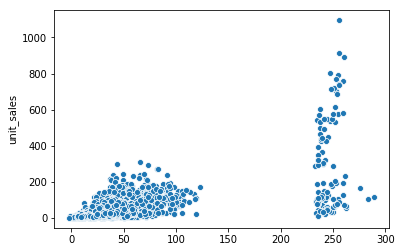

In [129]:
sns.scatterplot(y_hat, y_dev)

# L1 regularization - LASSO

In [130]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=53)
    lasso.fit(X_train, y_train)
    # calculate errors
    new_train_error = mean_squared_error(y_train, lasso.predict(X_train))
    new_validation_error = mean_squared_error(y_test, lasso.predict(X_test))
    new_dev_error = mean_squared_error(y_dev, lasso.predict(X_dev))
    # print errors as report
    print('alpha: {:7} | train error: {:5} | val error: {:6} | dev error: {}'.
          format(alpha,
                 round(new_train_error,3),
                 round(new_validation_error,3),
                 round(new_dev_error,3)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 2989.02 | val error: 2784.524 | dev error: 3055.176
alpha:    0.01 | train error: 2989.073 | val error: 2784.492 | dev error: 3055.307
alpha:     0.1 | train error: 2994.276 | val error: 2788.87 | dev error: 3061.6
alpha:       1 | train error: 3217.256 | val error: 3005.834 | dev error: 3304.395
alpha:      10 | train error: 4500.606 | val error: 4265.916 | dev error: 4851.851


In [157]:
lasso = Lasso(alpha=0.001, fit_intercept=True, random_state=53,normalize=True)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=53,
   selection='cyclic', tol=0.0001, warm_start=False)

In [158]:
y_hat = lasso.predict(X_dev)

In [159]:
print('alphas = 0.001')
lasso.score(X_dev, y_dev)

alphas = 0.001


0.385492533332195

In [160]:
print('alphas = 0.001')
print('lasso.score(X_dev, y_dev) :',lasso.score(X_dev, y_dev))
print('lasso.score(X_train, y_train) :',lasso.score(X_train, y_train))
print('lasso.score(X_test, y_test) : ',lasso.score(X_test, y_test))
print('       ')
print('r2_score(y_dev,y_hat) :',r2_score(y_dev,y_hat))

alphas = 0.001
lasso.score(X_dev, y_dev) : 0.385492533332195
lasso.score(X_train, y_train) : 0.3479167452605213
lasso.score(X_test, y_test) :  0.36284749251978266
       
r2_score(y_dev,y_hat) : 0.385492533332195


### R^2 (coefficient of determination) regression score function

In [135]:
from sklearn import metrics

In [136]:

r2_score(y_dev,y_hat)

0.385492533332195

In [137]:
print(' THE MAE IS : ' , metrics.mean_absolute_error(y_dev,y_hat))
print(' THE MSE IS : ' , metrics.mean_squared_error(y_dev,y_hat))
print(' THE RMSE IS : ' , np.sqrt(metrics.mean_squared_error(y_dev,y_hat)))


 THE MAE IS :  26.609556449878774
 THE MSE IS :  3056.6227419217707
 THE RMSE IS :  55.286732060429934


# LinearRegression

In [165]:
from sklearn.linear_model import LinearRegression

# Initialize the predictive model object
linear_model = LinearRegression(normalize=True,)

# Train the model using the training sets
lm=linear_model.fit(X_train, y_train)
lm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

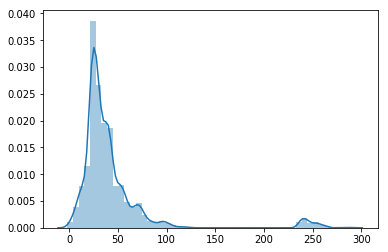

In [166]:
pred = linear_model.predict(X_dev)

sns.distplot(pred)

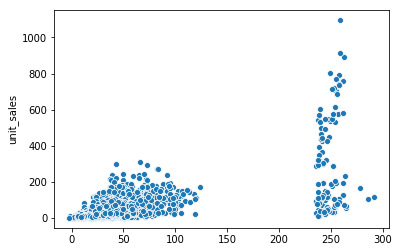

In [167]:
sns. scatterplot(pred, y_dev)

In [168]:
linear_model.score(X_train, y_train)

0.3480078664469348

In [169]:
#The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_dev, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_dev, pred))

Coefficients: 
 [ 1.23148338e-02 -1.14428785e+01  3.10516826e+00 -1.37823046e+01
 -5.89698086e-01 -4.59879869e+00  1.42672980e+01  3.68387796e+01
  4.31360651e+01  2.94086302e+01  2.15130956e+02  2.92444163e+01
 -1.64669007e+01  3.62701205e+01 -5.89698086e-01 -1.02682113e+01
  3.68387796e+01 -1.02472052e+01]
Mean squared error: 3055.17
Variance score: 0.39


In [170]:
error(pred, y_dev)


11273565.043901749

In [171]:
print('r2_score(y_dev,pred):',r2_score(y_dev,pred))

r2_score(y_dev,pred): 0.3857852622296555


In [173]:
print('linear_model.score(X_train, y_train) :',linear_model.score(X_train, y_train))
print('linear_model.score(X_dev, y_dev) :',linear_model.score(X_dev, y_dev))
print('linear_model.score(X_test, y_test) : ',linear_model.score(X_test, y_test))
print('       ')
print('r2_score(y_dev,pred) :',r2_score(y_dev,pred))

linear_model.score(X_train, y_train) : 0.3480078664469348
linear_model.score(X_dev, y_dev) : 0.3857852622296555
linear_model.score(X_test, y_test) :  0.3629595101698554
       
r2_score(y_dev,pred) : 0.3857852622296555


In [145]:
import math
from math import sqrt
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

# SVM - SVR

In [146]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1).fit(X_train, y_train)
#svmmod = LinearSVR(epsilon=0.1, tol=0.0001, C=1.0).fit(X_train, y_train)
regressor = SVR(kernel = 'rbf',gamma=0.05, epsilon=1.0, tol=0.0001, C=1.0).fit(X_train, y_train)
regressor

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.0001, verbose=False)

In [181]:
pred  = regressor.predict(X_dev)
pred1 = regressor.predict(X_test)

In [148]:
print(regressor.score(X_test,y_test))
print(r2_score(y_dev,pred))

-0.0405100683431292
-0.04182581828738252


In [182]:
print('kernel = "rbf",gamma=0.05, epsilon=1.0, tol=0.0001, C=1.0')
print('regressor.score(X_dev, y_dev) :',regressor.score(X_dev, y_dev))
print('regressor.score(X_train, y_train) :',regressor.score(X_train, y_train))
print('regressor.score(X_test, y_test) : ',regressor.score(X_test, y_test))
print('      DEV     ')
print('r2_score(y_dev,y_hat) :',r2_score(y_dev,pred))
print('       ')
print('       TEST     ')
print('r2_score(y_test,y1_hat) :',r2_score(y_test,pred1))

kernel = "rbf",gamma=0.05, epsilon=1.0, tol=0.0001, C=1.0
regressor.score(X_dev, y_dev) : -0.04182581828738252
regressor.score(X_train, y_train) : -0.03721024467366951
regressor.score(X_test, y_test) :  -0.0405100683431292
      DEV     
r2_score(y_dev,y_hat) : -0.04182581828738252
       
       TEST     
r2_score(y_test,y1_hat) : -0.0405100683431292
